In [ ]:
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install adjustText

In [ ]:
import pandas as pd

# Definir o caminho para o arquivo CSV
file_path = '/content/drive/My Drive/estatistica_aplicada.csv'

# Carregar o arquivo CSV em um DataFrame do pandas
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Exibir as primeiras linhas do DataFrame
df.head()

,fulfilled,expiration_date,date_closed,id,manufacturing_ending_date,order_items,date_last_updated,last_updated,pack_id,coupon,...,payments_payment_method_id,payments_transaction_amount_refunded,payments_status_detail,payments_issuer_id,payments_id,payments_coupon_id,payments_shipping_cost,payments_status,payments_installment_amount,payments_coupon_amount
0,True,2023-05-03T09:00:46.000-04:00,2023-04-05T09:00:46.000-04:00,2000005412505352,NaN,"[{'item': {'id': 1, 'title': 'Bulbasaur', 'cat...",2023-04-16T20:41:36+00:00,2023-04-16T16:41:16.000-04:00,2.000004e+15,"{'amount': 0, 'id': None}",...,account_money,0.0,accredited,2007.0,56510061103,NaN,0.00,approved,NaN,0.0
1,True,2023-05-03T10:17:15.000-04:00,2023-04-05T10:17:15.000-04:00,2000005412951620,NaN,"[{'item': {'id': 2, 'title': 'Ivysaur', 'categ...",2023-04-20T13:27:46+00:00,2023-04-20T09:27:46.000-04:00,NaN,"{'amount': 0, 'id': None}",...,master,0.0,accredited,24.0,56550020366,NaN,32.55,approved,165.07,0.0
2,True,2023-05-03T11:34:58.000-04:00,2023-04-05T11:34:58.000-04:00,2000005413436720,NaN,"[{'item': {'id': 3, 'title': 'Venusaur', 'cate...",2023-04-15T13:37:30+00:00,2023-04-15T09:37:29.000-04:00,NaN,"{'amount': 0, 'id': None}",...,pix,0.0,accredited,12501.0,56517410157,NaN,0.00,approved,NaN,0.0
3,True,2023-05-03T11:35:25.000-04:00,2023-04-05T11:35:25.000-04:00,2000005413437704,NaN,"[{'item': {'id': 4, 'title': 'Charmander', 'ca...",2023-04-14T18:17:40+00:00,2023-04-14T14:17:38.000-04:00,NaN,"{'amount': 0, 'id': None}",...,master,0.0,accredited,12518.0,56517423891,NaN,0.00,approved,34.95,0.0
4,True,2023-05-03T11:44:03.000-04:00,2023-04-05T11:44:03.000-04:00,2000005413508456,NaN,"[{'item': {'id': 5, 'title': 'Charmeleon', 'ca...",2023-04-14T12:42:38+00:00,2023-04-14T08:42:22.000-04:00,NaN,"{'amount': 0, 'id': None}",...,visa,0.0,accredited,25.0,56517881165,NaN,0.00,approved,93.67,0.0


In [ ]:
import pandas as pd
import ast

# Função para extrair os dados de produtos do CSV
def extract_order_items(row):
    items = []
    try:
        items_list = ast.literal_eval(row['order_items'])
        for item in items_list:
            product = item.get('item', {})
            items.append({
                'Produto': product.get('title', 'Desconhecido'),
                'Quantidade': item.get('quantity', 0),
                'Preço Unitário': item.get('unit_price', 0),
                'Categoria': product.get('category_id', 'Desconhecido'),
                'Status': row['status'],
                'data_de_venda' : row['date_closed'],
                'meio_de_pagamento' : row['payments_payment_method_id'],
                'numero_parcelas' : row['payments_installments']
            })
    except Exception as e:
        print(f"Erro ao processar itens do pedido: {e}")
    return items



# Aplicar a função para extrair todos os produtos com seus preços e status
df['extracted_items_with_price_and_status'] = df.apply(extract_order_items, axis=1)

# Criar uma lista de dicionários com produtos, quantidades, preços e status
item_list = []
for items in df['extracted_items_with_price_and_status']:
    for item in items:
        item_list.append(item)

# Criar um DataFrame a partir da lista de dicionários
items_df = pd.DataFrame(item_list)

anime_list = [
    'Fullmetal Alchemist: Brotherhood', 'Attack on Titan', 'Death Note', 'Naruto: Shippuden',
    'My Hero Academia', 'Cowboy Bebop', 'Neon Genesis Evangelion', 'One Piece', 'Steins;Gate',
    'Dragon Ball Z', 'Hunter x Hunter', 'One Punch Man', 'Sword Art Online', 'Demon Slayer: Kimetsu no Yaiba',
    'Bleach', 'Tokyo Ghoul', 'Code Geass: Lelouch of the Rebellion', 'Fairy Tail', 'Samurai Champloo',
    'JoJo\'s Bizarre Adventure', 'Clannad: After Story', 'Mob Psycho 100', 'Hellsing', 'Psycho-Pass',
    'Paranoia Agent', 'Re: Starting Life in Another World', 'Made in Abyss', 'Gintama',
    'Kiseijuu: Sei no Kakuritsu (Parasyte)', 'Akira', 'Angel Beats!', 'Higurashi no Naku Koro ni (Higurashi: When They Cry)',
    'Baccano!', 'Toradora!', 'Your Name (Kimi no Na wa)', 'The Promised Neverland', 'Vinland Saga',
    'Black Clover', 'Kakegurui'
]

# Obter IDs de categorias únicas
unique_categories = items_df['Categoria'].unique()
category_to_anime = dict(zip(unique_categories, anime_list[:len(unique_categories)]))

# Substituir IDs de categorias pelos nomes dos animes
items_df['Categoria'] = items_df['Categoria'].map(category_to_anime).fillna('Desconhecido')

# Visualizar as primeiras linhas do DataFrame
print(items_df.head())

      Produto  Quantidade  Preço Unitário                         Categoria  \
0   Bulbasaur           1          294.02  Fullmetal Alchemist: Brotherhood   
1     Ivysaur           1          132.52                   Attack on Titan   
2    Venusaur           1          309.49  Fullmetal Alchemist: Brotherhood   
3  Charmander           1          349.49                        Death Note   
4  Charmeleon           1          170.52                 Naruto: Shippuden   

  Status                  data_de_venda meio_de_pagamento  numero_parcelas  
0   paid  2023-04-05T09:00:46.000-04:00     account_money                1  
1   paid  2023-04-05T10:17:15.000-04:00            master                1  
2   paid  2023-04-05T11:34:58.000-04:00               pix                1  
3   paid  2023-04-05T11:35:25.000-04:00            master               10  
4   paid  2023-04-05T11:44:03.000-04:00              visa                2  


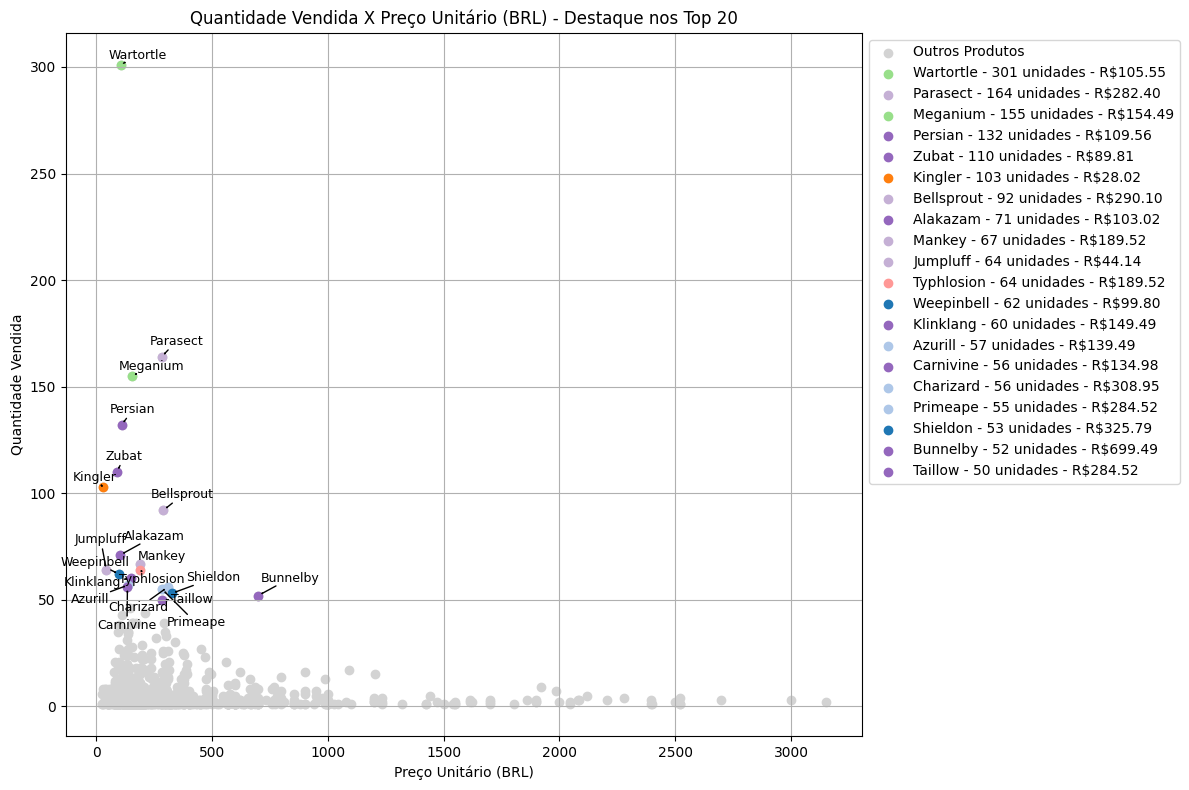

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

from collections import Counter

# Agrupar por produto e calcular soma das quantidades e média dos preços
grouped_df = items_df.groupby('Produto').agg({'Quantidade': 'sum', 'Preço Unitário': 'mean'}).reset_index()

# Obter os 10 produtos mais vendidos
top_10_items = grouped_df.nlargest(20, 'Quantidade')

# Gerar gráfico de dispersão para todos os produtos
plt.figure(figsize=(12, 8))

# Cores para os 10 produtos mais vendidos usando a paleta 'tab20'
cmap = plt.get_cmap('tab20', 20)  # Usar a paleta 'tab20' com 20 cores diferentes

# Plotar todos os produtos
plt.scatter(grouped_df['Preço Unitário'], grouped_df['Quantidade'], color='lightgray', label='Outros Produtos')

# Plotar os 10 mais vendidos com cores diferentes
for i, row in top_10_items.iterrows():
    color = cmap(i % 10)  # Garantir que usamos uma cor do mapa de cores
    plt.scatter(row['Preço Unitário'], row['Quantidade'], color=color, label=f"{row['Produto']} - {row['Quantidade']} unidades - R${row['Preço Unitário']:.2f}")

# Adicionar rótulos aos produtos no gráfico
texts = []
for i, row in top_10_items.iterrows():
    text = plt.text(row['Preço Unitário'], row['Quantidade'], row['Produto'], fontsize=9, ha='right', color='black')
    texts.append(text)

# Ajustar rótulos para evitar sobreposição
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

# Configurações adicionais do gráfico
plt.xlabel('Preço Unitário (BRL)')
plt.ylabel('Quantidade Vendida')
plt.title('Quantidade Vendida X Preço Unitário (BRL) - Destaque nos Top 20')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Posicionar a legenda fora do gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


Coeficiente de Correlação de Pearson: -0.25
                            OLS Regression Results                            
Dep. Variable:             Quantidade   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.249
Date:                Sat, 24 Aug 2024   Prob (F-statistic):              0.278
Time:                        00:17:03   Log-Likelihood:                -109.24
No. Observations:                  20   AIC:                             222.5
Df Residuals:                      18   BIC:                             224.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------


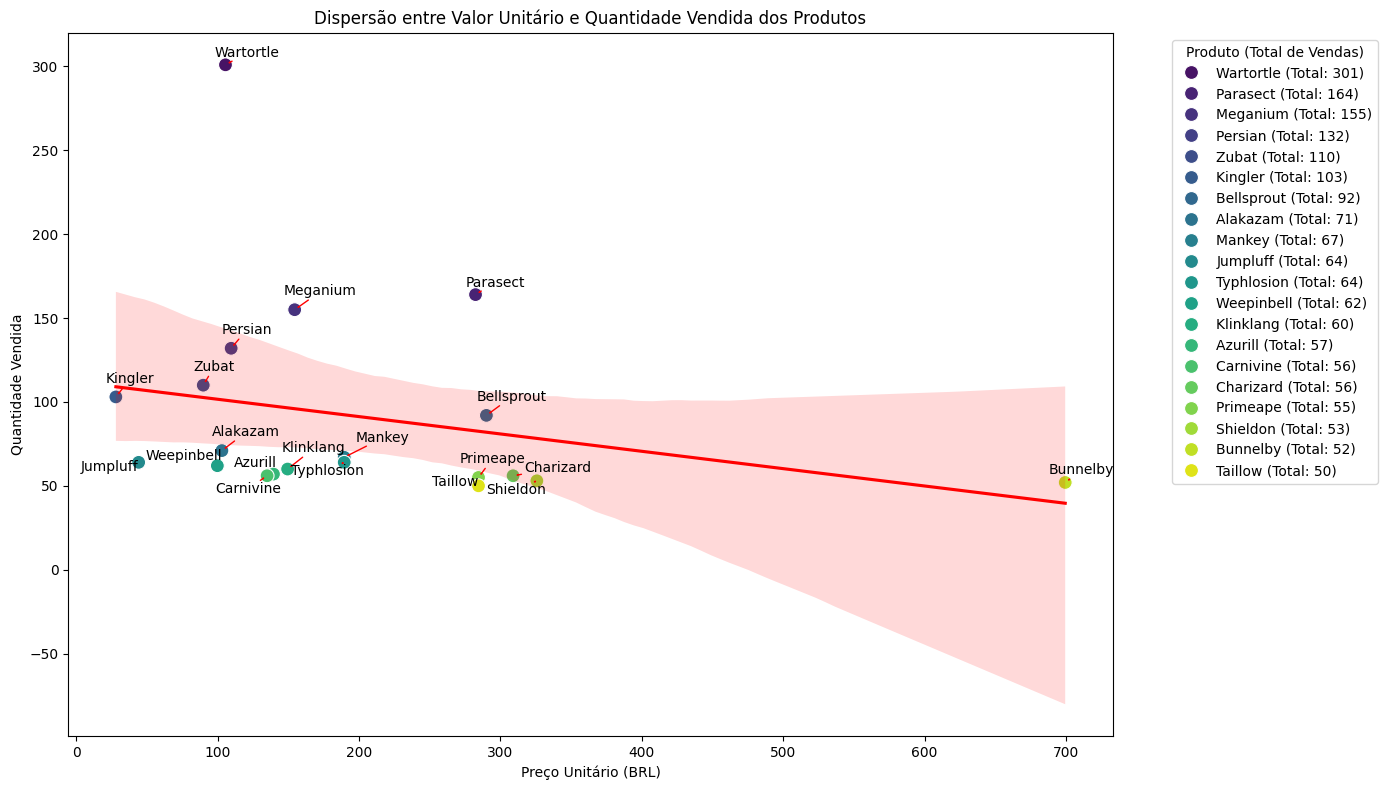

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from adjustText import adjust_text

# Supondo que items_df seja o DataFrame com os dados
# Agrupar os dados para calcular a quantidade total de vendas e o valor unitário médio por produto
data_summary = items_df.groupby('Produto').agg({
    'Quantidade': 'sum',
    'Preço Unitário': 'mean'
}).reset_index()

# Limitar o número de produtos para evitar problemas de memória
top_products = data_summary.nlargest(20, 'Quantidade')  # Selecionar os 10 produtos com mais vendas

# Análise Estatística
# Coeficiente de Correlação de Pearson
correlation, _ = stats.pearsonr(top_products['Preço Unitário'], top_products['Quantidade'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Regressão Linear
X = sm.add_constant(top_products['Preço Unitário'])
y = top_products['Quantidade']
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de Dispersão com Regressão Linear
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=top_products, x='Preço Unitário', y='Quantidade', hue='Produto', palette='viridis', s=100)

# Adicionar a linha de regressão
sns.regplot(data=top_products, x='Preço Unitário', y='Quantidade', scatter=False, color='red')

# Adicionar título e rótulos
plt.title('Dispersão entre Valor Unitário e Quantidade Vendida dos Produtos')
plt.xlabel('Preço Unitário (BRL)')
plt.ylabel('Quantidade Vendida')

# Adicionar totais de vendas à legenda
handles, labels = scatter_plot.get_legend_handles_labels()
total_vendas = top_products.set_index('Produto')['Quantidade'].to_dict()
new_labels = [f'{label} (Total: {total_vendas[label]})' for label in labels]
scatter_plot.legend(handles, new_labels, title='Produto (Total de Vendas)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar anotações com nomes dos produtos
texts = [plt.text(row['Preço Unitário'], row['Quantidade'], row['Produto'],
                  verticalalignment='bottom',
                  horizontalalignment='right',
                  fontsize=10) for _, row in top_products.iterrows()]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()


1. Coeficiente de Correlação de Pearson: -0.25
Significado: Um coeficiente de correlação de Pearson de -0.25 sugere uma correlação negativa fraca entre a quantidade vendida e o preço unitário. Isso indica que, em geral, à medida que o preço unitário aumenta, a quantidade vendida tende a diminuir ligeiramente, mas a relação é fraca.
2. Resultados da Regressão Linear
R-squared: 0.065:

Significado: Apenas 6.5% da variação na quantidade vendida é explicada pelo modelo de regressão com base no preço unitário. Isso indica que o modelo tem uma capacidade muito limitada para explicar a quantidade vendida com base no preço unitário.
Adj. R-squared: 0.013:

Significado: O valor ajustado de R-squared leva em consideração o número de variáveis no modelo e o número de observações. Um valor muito baixo sugere que o modelo não está explicando bem a variabilidade dos dados, mesmo após ajustar pelo número de preditores.
Coeficiente do Preço Unitário: -0.1034:

Significado: Para cada unidade adicional no preço unitário, a quantidade vendida diminui em média 0.1034 unidades. No entanto, o coeficiente é negativo, mas o p-valor (0.278) indica que essa relação não é estatisticamente significativa.
p-valor do Coeficiente do Preço Unitário: 0.278:

Significado: O p-valor maior que 0.05 sugere que não há evidência suficiente para rejeitar a hipótese nula de que o coeficiente do preço unitário é igual a zero. Em outras palavras, não há evidência estatística para afirmar que o preço unitário afeta significativamente a quantidade vendida.
3. Notas Adicionais
Omnibus e Jarque-Bera (JB) Testes:

Ambos os testes indicam que os resíduos do modelo não seguem uma distribuição normal, o que pode sugerir problemas com a adequação do modelo.
Durbin-Watson: 0.346:

Significado: O Durbin-Watson é uma estatística que testa a autocorrelação dos resíduos. Um valor abaixo de 1.0 pode indicar uma alta autocorrelação positiva, sugerindo que os resíduos podem estar correlacionados.
Skew e Kurtosis:

Skew: 2.237 e Kurtosis: 7.925 indicam que a distribuição dos resíduos é assimétrica e possui caudas mais pesadas do que uma distribuição normal.
Resumo
Os resultados sugerem que há uma correlação fraca e negativa entre o preço unitário e a quantidade vendida. A análise de regressão linear mostra que o modelo não é muito eficaz em explicar a variação na quantidade vendida com base no preço unitário. O preço unitário tem um efeito muito pequeno e não significativo sobre a quantidade vendida, e o modelo tem problemas potenciais com a normalidade dos resíduos e autocorrelação.

A categoria que mais vendeu é 'Fullmetal Alchemist: Brotherhood' com 785 unidades.


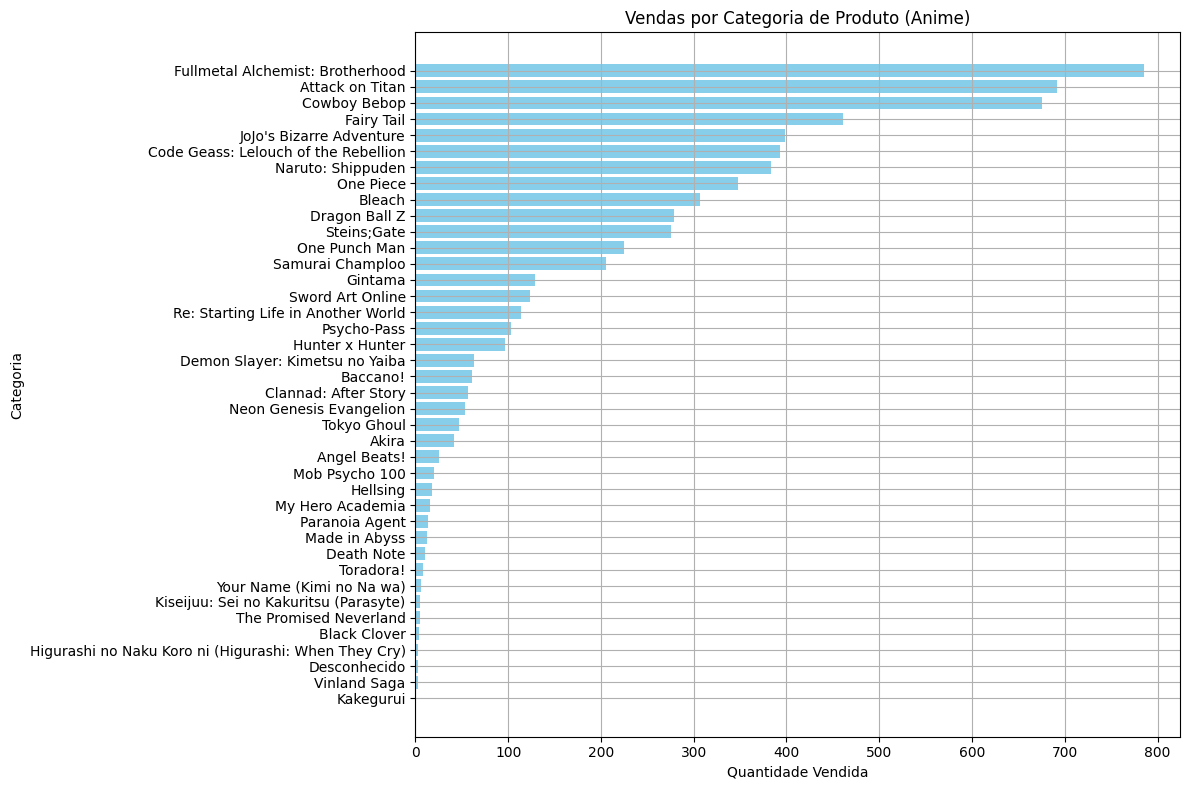

In [ ]:

# Agrupar por categoria e calcular soma das quantidades
category_sales_df = items_df.groupby('Categoria').agg({'Quantidade': 'sum'}).reset_index()

# Ordenar o DataFrame pela quantidade vendida
category_sales_df = category_sales_df.sort_values(by='Quantidade', ascending=False)

# Encontrar a categoria que mais vendeu
top_category = category_sales_df.loc[category_sales_df['Quantidade'].idxmax()]

print(f"A categoria que mais vendeu é '{top_category['Categoria']}' com {top_category['Quantidade']} unidades.")

# Gerar gráfico de barras para vendas por categoria
plt.figure(figsize=(12, 8))
plt.barh(category_sales_df['Categoria'], category_sales_df['Quantidade'], color='skyblue')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria')
plt.title('Vendas por Categoria de Produto (Anime)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

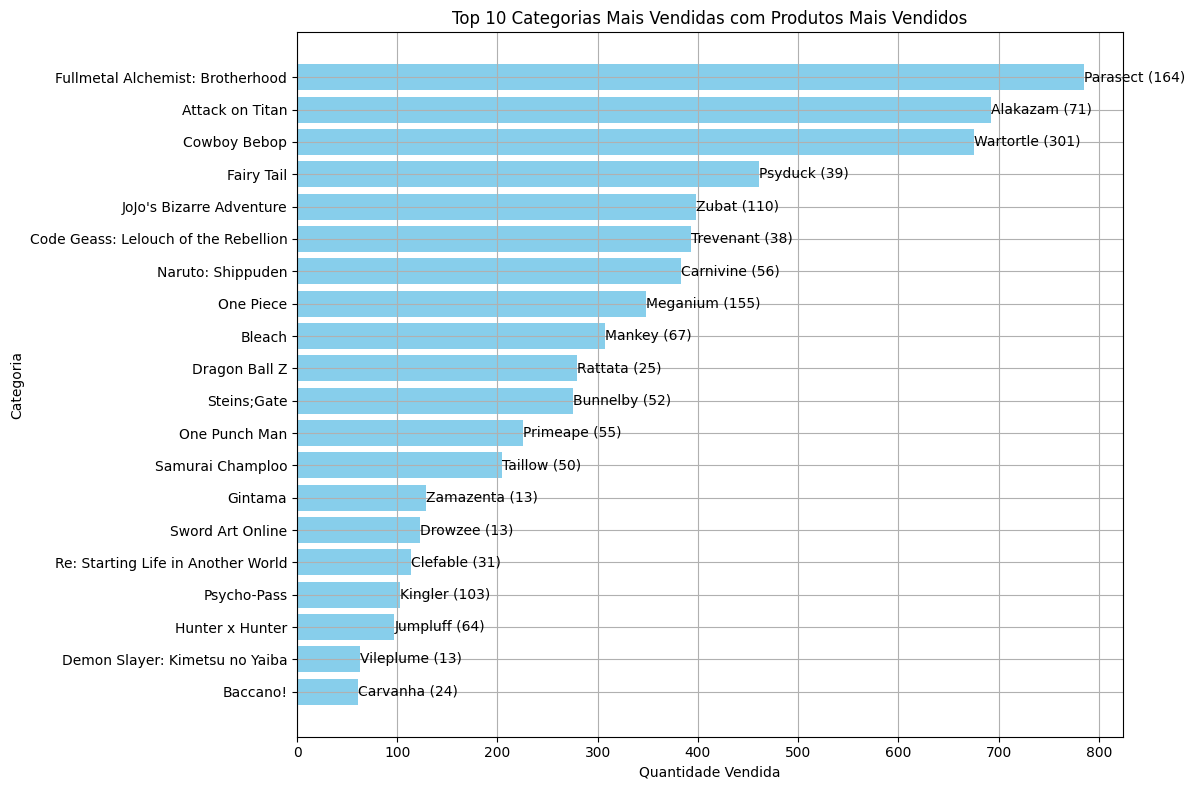

In [ ]:
# Selecionar as 10 categorias mais vendidas
top_10_categories_df = category_sales_df.sort_values(by='Quantidade', ascending=False).head(20)

# Filtrar o DataFrame original para incluir apenas as 10 categorias mais vendidas
top_10_categories_ids = top_10_categories_df['Categoria']
top_10_items_df = items_df[items_df['Categoria'].isin(top_10_categories_ids)]

# Agrupar por categoria e produto para somar quantidades
category_product_sales_df = top_10_items_df.groupby(['Categoria', 'Produto']).agg({'Quantidade': 'sum'}).reset_index()

# Encontrar o produto mais vendido por categoria dentro do top 10
top_products_per_category = category_product_sales_df.loc[category_product_sales_df.groupby('Categoria')['Quantidade'].idxmax()]

# Gerar gráfico de barras para as 10 categorias mais vendidas
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_categories_df['Categoria'], top_10_categories_df['Quantidade'], color='skyblue')

# Adicionar rótulos com o produto mais vendido
for i, bar in enumerate(bars):
    category = top_10_categories_df['Categoria'].iloc[i]
    top_product = top_products_per_category[top_products_per_category['Categoria'] == category]
    if not top_product.empty:
        product_name = top_product['Produto'].values[0]
        product_qty = top_product['Quantidade'].values[0]
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{product_name} ({product_qty})',
                 va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria')
plt.title('Top 10 Categorias Mais Vendidas com Produtos Mais Vendidos')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

Agora vou tentar mesclar todas as observaçoes


In [ ]:
import pandas as pd
import ast

# Função para extrair os dados de produtos do CSV
def extract_order_items(row):
    items = []
    try:
        items_list = ast.literal_eval(row['order_items'])
        for item in items_list:
            product = item.get('item', {})
            items.append({
                'Produto': product.get('title', 'Desconhecido'),
                'Quantidade': item.get('quantity', 0),
                'Preço Unitário': item.get('unit_price', 0),
                'Categoria': product.get('category_id', 'Desconhecido'),
                'Tipo de Anuncio': item.get('listing_type_id', 'Desconhecido'),
                'Status': row['status'],
                'data_de_venda' : row['date_closed'],
                'meio_de_pagamento' : row['payments_payment_method_id'],
                'numero_parcelas' : row['payments_installments']
            })
    except Exception as e:
        print(f"Erro ao processar itens do pedido: {e}")
    return items



# Aplicar a função para extrair todos os produtos com seus preços e status
df['extracted_items_with_price_and_status'] = df.apply(extract_order_items, axis=1)

# Criar uma lista de dicionários com produtos, quantidades, preços e status
item_list = []
for items in df['extracted_items_with_price_and_status']:
    for item in items:
        item_list.append(item)

# Criar um DataFrame a partir da lista de dicionários
items_df = pd.DataFrame(item_list)

anime_list = [
    'Fullmetal Alchemist: Brotherhood', 'Attack on Titan', 'Death Note', 'Naruto: Shippuden',
    'My Hero Academia', 'Cowboy Bebop', 'Neon Genesis Evangelion', 'One Piece', 'Steins;Gate',
    'Dragon Ball Z', 'Hunter x Hunter', 'One Punch Man', 'Sword Art Online', 'Demon Slayer: Kimetsu no Yaiba',
    'Bleach', 'Tokyo Ghoul', 'Code Geass: Lelouch of the Rebellion', 'Fairy Tail', 'Samurai Champloo',
    'JoJo\'s Bizarre Adventure', 'Clannad: After Story', 'Mob Psycho 100', 'Hellsing', 'Psycho-Pass',
    'Paranoia Agent', 'Re: Starting Life in Another World', 'Made in Abyss', 'Gintama',
    'Kiseijuu: Sei no Kakuritsu (Parasyte)', 'Akira', 'Angel Beats!', 'Higurashi no Naku Koro ni (Higurashi: When They Cry)',
    'Baccano!', 'Toradora!', 'Your Name (Kimi no Na wa)', 'The Promised Neverland', 'Vinland Saga',
    'Black Clover', 'Kakegurui'
]

# Obter IDs de categorias únicas
unique_categories = items_df['Categoria'].unique()
category_to_anime = dict(zip(unique_categories, anime_list[:len(unique_categories)]))

# Substituir IDs de categorias pelos nomes dos animes
items_df['Categoria'] = items_df['Categoria'].map(category_to_anime).fillna('Desconhecido')

# Visualizar as primeiras linhas do DataFrame
print(items_df.head())


      Produto  Quantidade  Preço Unitário                         Categoria  \
0   Bulbasaur           1          294.02  Fullmetal Alchemist: Brotherhood   
1     Ivysaur           1          132.52                   Attack on Titan   
2    Venusaur           1          309.49  Fullmetal Alchemist: Brotherhood   
3  Charmander           1          349.49                        Death Note   
4  Charmeleon           1          170.52                 Naruto: Shippuden   

  Tipo de Anuncio Status                  data_de_venda meio_de_pagamento  \
0    gold_special   paid  2023-04-05T09:00:46.000-04:00     account_money   
1    gold_special   paid  2023-04-05T10:17:15.000-04:00            master   
2        gold_pro   paid  2023-04-05T11:34:58.000-04:00               pix   
3        gold_pro   paid  2023-04-05T11:35:25.000-04:00            master   
4    gold_special   paid  2023-04-05T11:44:03.000-04:00              visa   

   numero_parcelas  
0                1  
1                1  

E se existir uma relação entre os produros mais vendidos e o mais cancelados ?

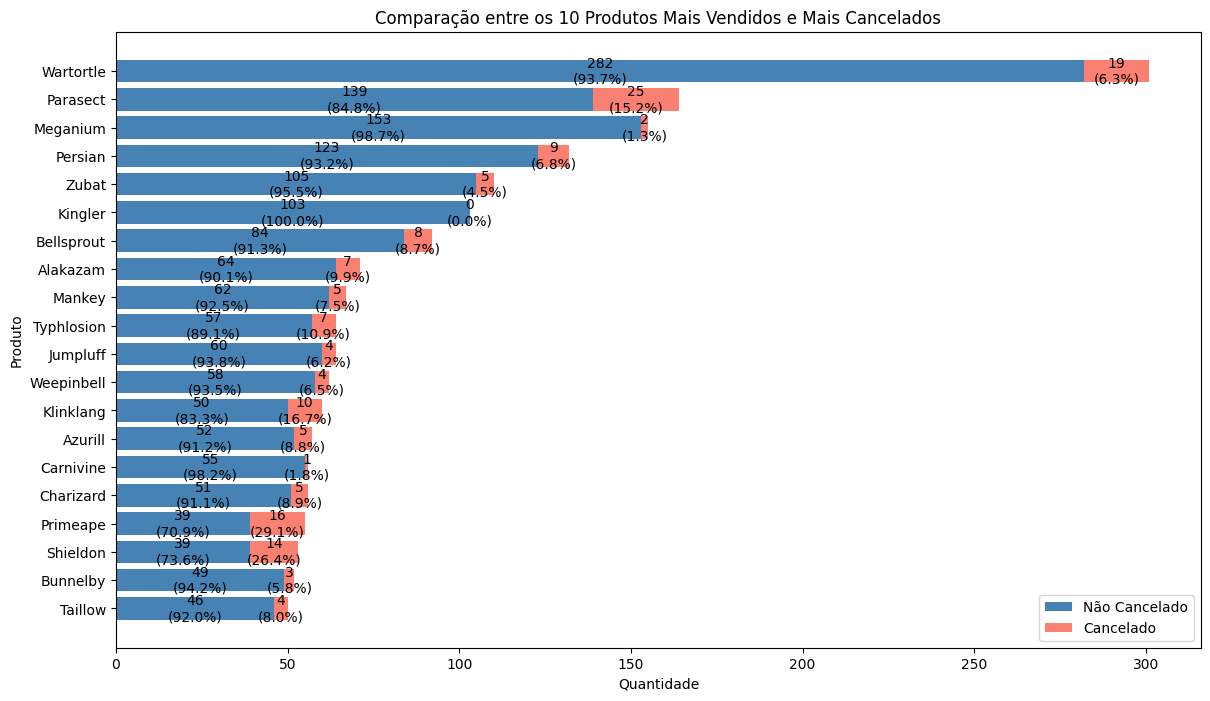

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ordenar os produtos pela quantidade vendida e selecionar os 10 mais vendidos
products_sorted = items_df.groupby('Produto').agg({
    'Quantidade': 'sum',
    'Status': lambda x: (x == 'cancelled').sum()
}).sort_values(by='Quantidade', ascending=False).head(20).reset_index()

# Renomear a coluna de Status para Cancelado
products_sorted.rename(columns={'Status': 'cancelled'}, inplace=True)

# Calcular a quantidade não cancelada
products_sorted['não_cancelado'] = products_sorted['Quantidade'] - products_sorted['cancelled']

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(14, 8))

# Plotar barras empilhadas para quantidade não cancelada e cancelada
bars1 = plt.barh(products_sorted['Produto'], products_sorted['não_cancelado'], color='steelblue', label='Não Cancelado')
bars2 = plt.barh(products_sorted['Produto'], products_sorted['cancelled'], color='salmon', left=products_sorted['não_cancelado'], label='Cancelado')

# Adicionar título e rótulos
plt.title('Comparação entre os 10 Produtos Mais Vendidos e Mais Cancelados')
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.legend()

# Adicionar os valores absolutos e porcentagens ao gráfico
for index, row in products_sorted.iterrows():
    plt.text(row['não_cancelado'] / 2, index, f"{int(row['não_cancelado'])}\n({(row['não_cancelado'] / row['Quantidade'] * 100):.1f}%)", color='black', ha='center', va='center')
    plt.text(row['não_cancelado'] + row['cancelled'] / 2, index, f"{int(row['cancelled'])}\n({(row['cancelled'] / row['Quantidade'] * 100):.1f}%)", color='black', ha='center', va='center')

plt.gca().invert_yaxis()

plt.show()


Coeficiente de Correlação de Pearson: 0.50
                            OLS Regression Results                            
Dep. Variable:              cancelled   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     5.865
Date:                Fri, 23 Aug 2024   Prob (F-statistic):             0.0262
Time:                        21:31:20   Log-Likelihood:                -62.098
No. Observations:                  20   AIC:                             128.2
Df Residuals:                      18   BIC:                             130.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

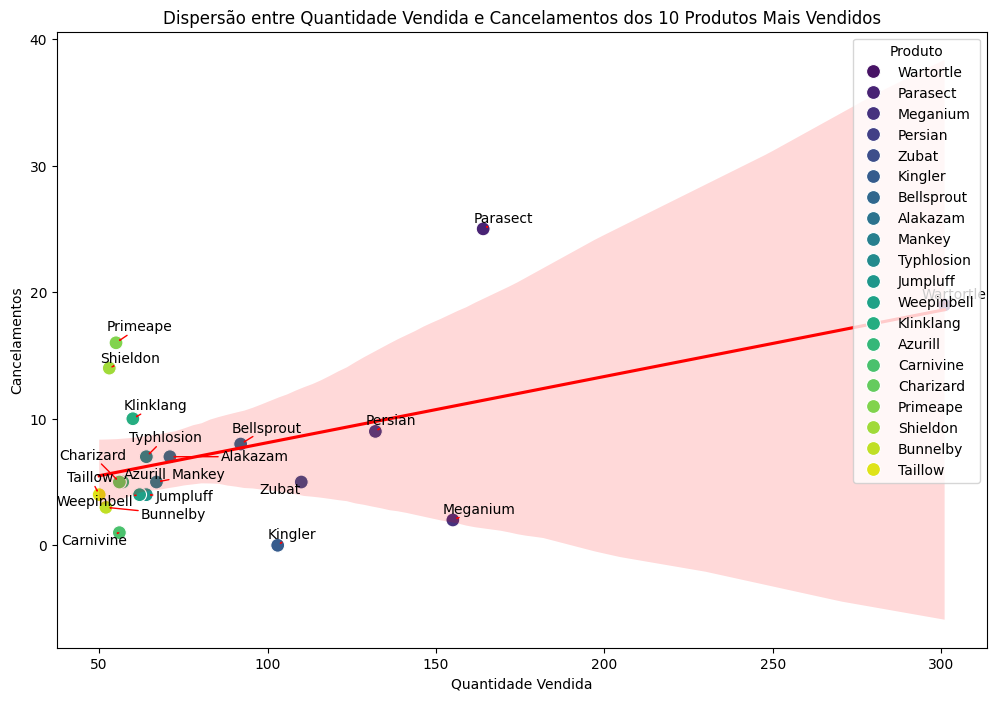

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from adjustText import adjust_text  # Biblioteca para ajustar as anotações

# Análise Estatística
# Coeficiente de Correlação de Pearson
correlation, _ = stats.pearsonr(products_sorted['Quantidade'], products_sorted['cancelled'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Regressão Linear
X = sm.add_constant(products_sorted['Quantidade'])
y = products_sorted['cancelled']
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de Dispersão com Regressão Linear
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=products_sorted, x='Quantidade', y='cancelled', hue='Produto', palette='viridis', s=100)

# Adicionar a linha de regressão
sns.regplot(data=products_sorted, x='Quantidade', y='cancelled', scatter=False, color='red')

# Adicionar anotações com nomes dos produtos e ajustar a posição para evitar sobreposição
texts = [plt.text(products_sorted['Quantidade'].iloc[i],
                  products_sorted['cancelled'].iloc[i],
                  products_sorted['Produto'].iloc[i],
                  verticalalignment='bottom',
                  horizontalalignment='right')
         for i in range(len(products_sorted))]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Dispersão entre Quantidade Vendida e Cancelamentos dos 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Cancelamentos')
plt.show()

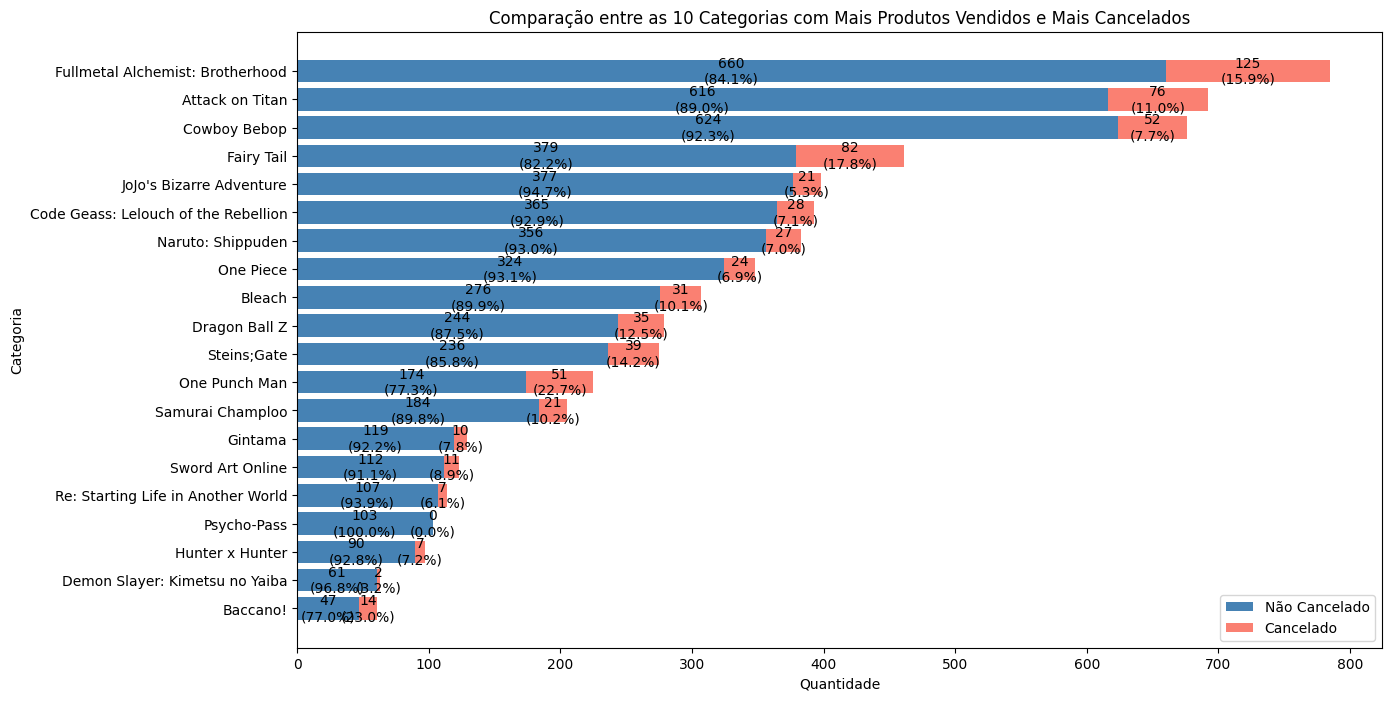

In [ ]:
# Agrupar os dados pela categoria e calcular a quantidade total vendida e cancelada para cada categoria
categories_sorted = items_df.groupby('Categoria').agg({
    'Quantidade': 'sum',
    'Status': lambda x: (x == 'cancelled').sum()
}).sort_values(by='Quantidade', ascending=False).head(20).reset_index()

# Renomear a coluna de Status para Cancelado
categories_sorted.rename(columns={'Status': 'cancelled'}, inplace=True)

# Calcular a quantidade não cancelada
categories_sorted['não_cancelado'] = categories_sorted['Quantidade'] - categories_sorted['cancelled']

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(14, 8))

# Plotar barras empilhadas para quantidade não cancelada e cancelada
bars1 = plt.barh(categories_sorted['Categoria'], categories_sorted['não_cancelado'], color='steelblue', label='Não Cancelado')
bars2 = plt.barh(categories_sorted['Categoria'], categories_sorted['cancelled'], color='salmon', left=categories_sorted['não_cancelado'], label='Cancelado')

# Adicionar título e rótulos
plt.title('Comparação entre as 10 Categorias com Mais Produtos Vendidos e Mais Cancelados')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.legend()

# Adicionar os valores absolutos e porcentagens ao gráfico
for index, row in categories_sorted.iterrows():
    plt.text(row['não_cancelado'] / 2, index, f"{int(row['não_cancelado'])}\n({(row['não_cancelado'] / row['Quantidade'] * 100):.1f}%)", color='black', ha='center', va='center')
    plt.text(row['não_cancelado'] + row['cancelled'] / 2, index, f"{int(row['cancelled'])}\n({(row['cancelled'] / row['Quantidade'] * 100):.1f}%)", color='black', ha='center', va='center')

plt.gca().invert_yaxis()

plt.show()

Coeficiente de Correlação de Pearson: 0.85
                            OLS Regression Results                            
Dep. Variable:              cancelled   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     48.46
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           1.67e-06
Time:                        21:51:01   Log-Likelihood:                -83.695
No. Observations:                  20   AIC:                             171.4
Df Residuals:                      18   BIC:                             173.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

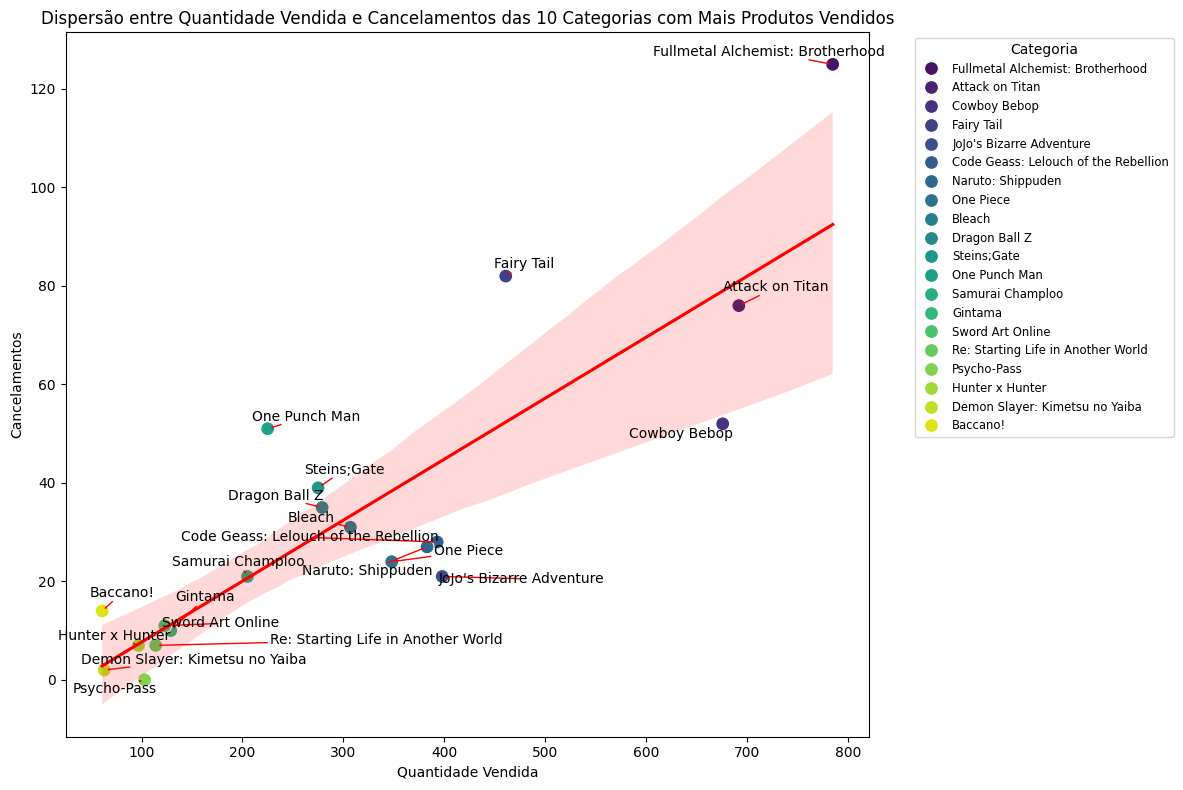

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from adjustText import adjust_text

# Análise Estatística
# Coeficiente de Correlação de Pearson
correlation, _ = stats.pearsonr(categories_sorted['Quantidade'], categories_sorted['cancelled'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Regressão Linear
X = sm.add_constant(categories_sorted['Quantidade'])
y = categories_sorted['cancelled']
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de Dispersão com Regressão Linear
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=categories_sorted, x='Quantidade', y='cancelled', hue='Categoria', palette='viridis', s=100)

# Adicionar a linha de regressão
sns.regplot(data=categories_sorted, x='Quantidade', y='cancelled', scatter=False, color='red')

# Adicionar anotações com nomes das categorias e ajustar a posição para evitar sobreposição
texts = [plt.text(categories_sorted['Quantidade'].iloc[i],
                  categories_sorted['cancelled'].iloc[i],
                  categories_sorted['Categoria'].iloc[i],
                  verticalalignment='bottom',
                  horizontalalignment='right')
         for i in range(len(categories_sorted))]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Ajustar a posição e o tamanho da legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.title('Dispersão entre Quantidade Vendida e Cancelamentos das 10 Categorias com Mais Produtos Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Cancelamentos')
plt.tight_layout()  # Ajustar o layout para não cortar o gráfico
plt.show()


Coeficiente de Correlação de Pearson: -0.10
                            OLS Regression Results                            
Dep. Variable:              cancelled   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.114
Method:                 Least Squares   F-statistic:                   0.08204
Date:                Fri, 23 Aug 2024   Prob (F-statistic):              0.782
Time:                        20:58:43   Log-Likelihood:                -31.079
No. Observations:                  10   AIC:                             66.16
Df Residuals:                       8   BIC:                             66.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


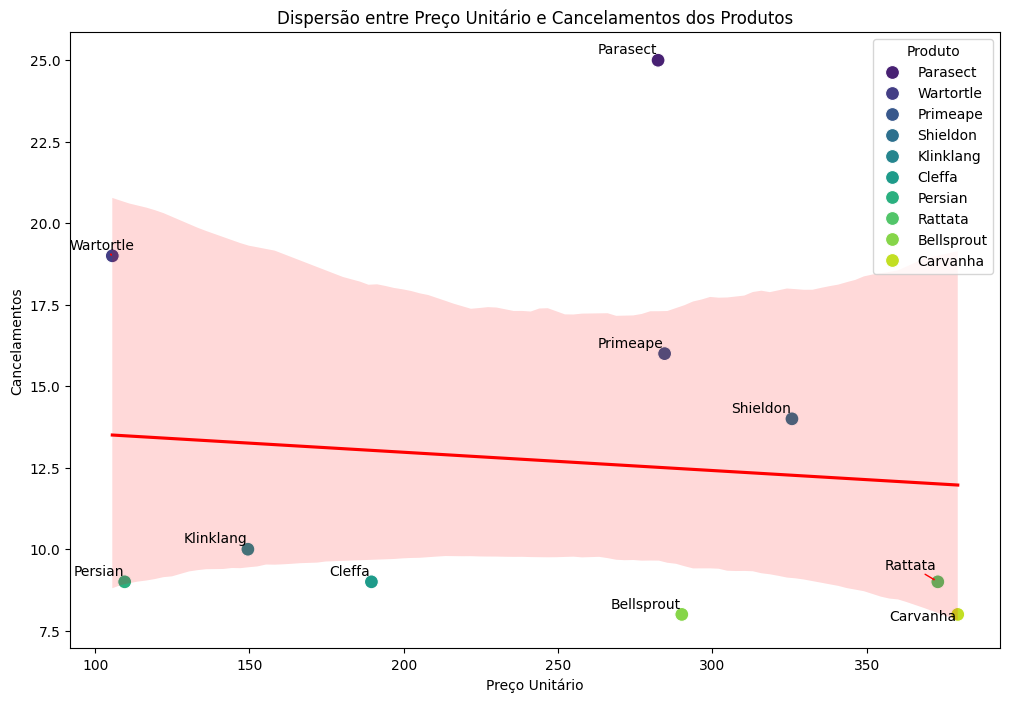

In [ ]:
# Agrupar os dados para calcular a quantidade total de cancelamentos e o preço médio por produto
data_summary = items_df.groupby('Produto').agg({
    'Quantidade': 'sum',
    'Status': lambda x: (x == 'cancelled').sum(),
    'Preço Unitário': 'mean'
}).reset_index()

# Renomear a coluna de Status para Cancelado
data_summary.rename(columns={'Status': 'cancelled'}, inplace=True)

# Limitar o número de produtos para evitar problemas de memória
top_products = data_summary.nlargest(10, 'cancelled')  # Selecionar os 10 produtos com mais cancelamentos

# Análise Estatística
# Coeficiente de Correlação de Pearson
correlation, _ = stats.pearsonr(top_products['Preço Unitário'], top_products['cancelled'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Regressão Linear
X = sm.add_constant(top_products['Preço Unitário'])
y = top_products['cancelled']
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de Dispersão com Regressão Linear
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=top_products, x='Preço Unitário', y='cancelled', hue='Produto', palette='viridis', s=100)

# Adicionar a linha de regressão
sns.regplot(data=top_products, x='Preço Unitário', y='cancelled', scatter=False, color='red')

# Adicionar anotações com nomes dos produtos e ajustar a posição para evitar sobreposição
texts = [plt.text(top_products['Preço Unitário'].iloc[i],
                  top_products['cancelled'].iloc[i],
                  top_products['Produto'].iloc[i],
                  verticalalignment='bottom',
                  horizontalalignment='right',
                  fontsize=10)  # Reduzir o tamanho da fonte das anotações
         for i in range(len(top_products))]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Dispersão entre Preço Unitário e Cancelamentos dos Produtos')
plt.xlabel('Preço Unitário')
plt.ylabel('Cancelamentos')
plt.show()

<ipython-input-19-284e952f5757>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  items_df['Mes_Ano'] = pd.to_datetime(items_df['data_de_venda']).dt.to_period('M')


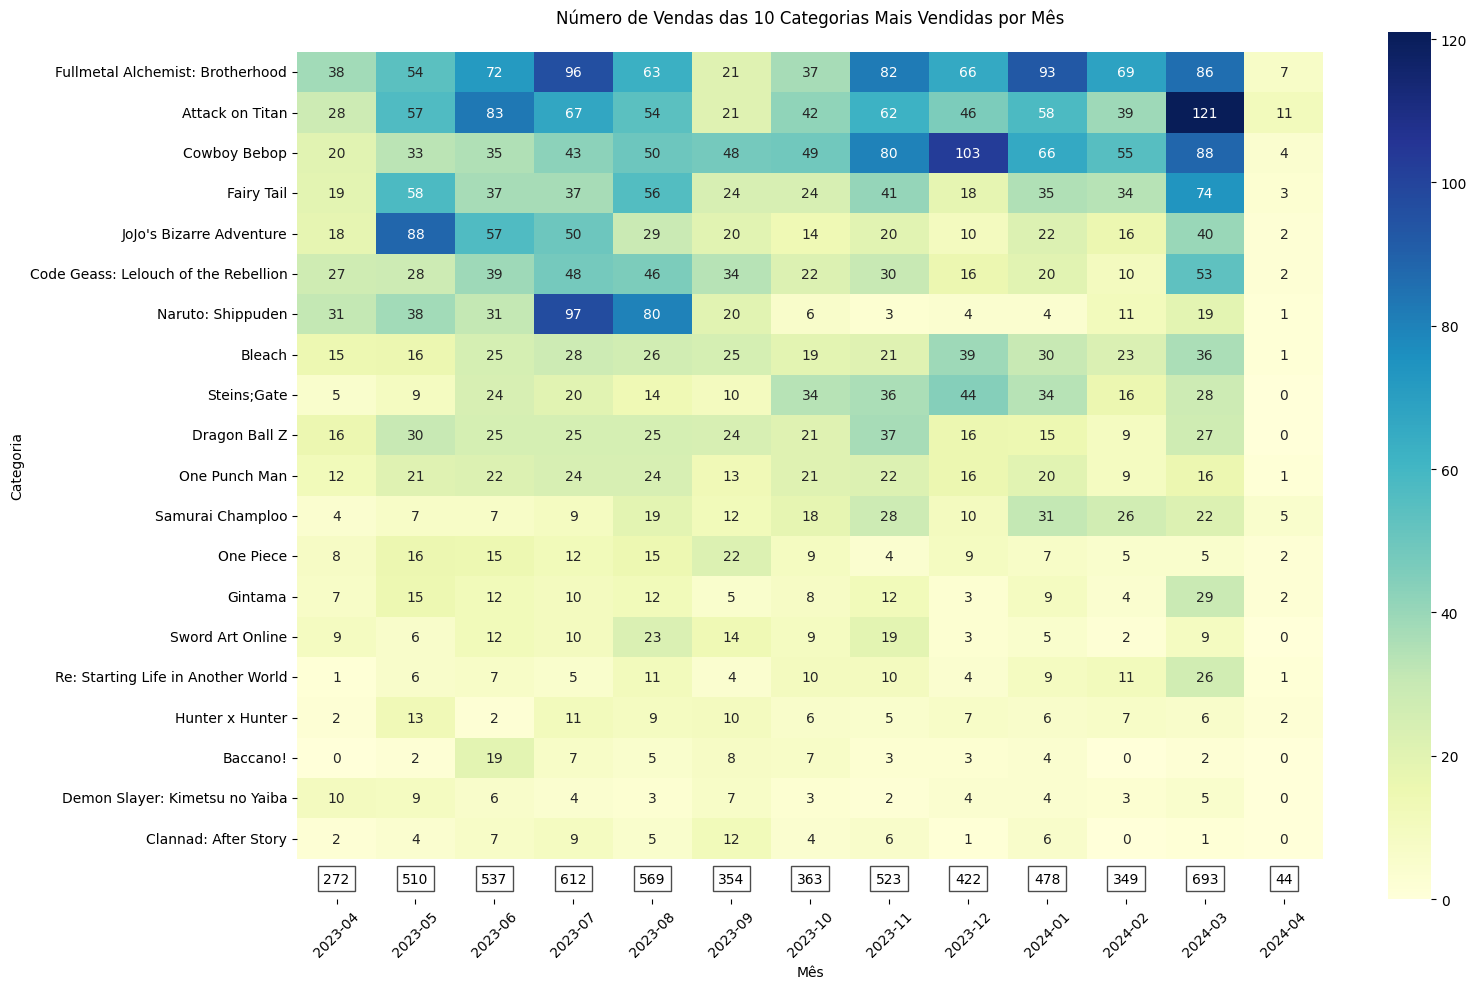

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que items_df seja o DataFrame com os dados
# Extrair o mês e o ano da coluna 'data_de_venda'
items_df['Mes_Ano'] = pd.to_datetime(items_df['data_de_venda']).dt.to_period('M')

# Agrupar as vendas por categoria e mês
contingency_table1 = pd.crosstab(items_df['Categoria'], items_df['Mes_Ano'])

# Calcular a soma total de vendas por categoria
total_vendas_por_categoria = contingency_table1.sum(axis=1)

# Selecionar as 10 categorias que mais vendem
top_10_categorias = total_vendas_por_categoria.nlargest(20).index

# Filtrar a tabela de contingência para essas 10 categorias
contingency_table_top_10_1 = contingency_table1.loc[top_10_categorias]

# Calcular o total de vendas por mês
total_vendas_por_mes = contingency_table_top_10_1.sum(axis=0)

# Criar o gráfico de calor
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(contingency_table_top_10_1, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

# Adicionar título e rótulos
plt.title('Número de Vendas das 10 Categorias Mais Vendidas por Mês')
plt.xlabel('Mês')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adicionar totais abaixo de cada coluna no heatmap
# Ajustar o layout para deixar espaço para os totais
plt.gca().set_ylim(len(top_10_categorias) + 1, -0.5) # Expande o limite do gráfico

for i, total in enumerate(total_vendas_por_mes):
    plt.text(i + 0.5, len(top_10_categorias) + 0.5, total, ha='center', va='center', color='black',bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Transformar a tabela de contingência em uma matriz NumPy para análise
contingency_matrix = contingency_table_top_10_1.values

# Calcular a correlação entre as categorias e as horas
corr, _ = pearsonr(contingency_matrix.flatten(), np.repeat(np.arange(contingency_matrix.shape[1]), contingency_matrix.shape[0]))
print(f'Correlação de Pearson: {corr:.2f}')

Correlação de Pearson: -0.69


In [ ]:
from scipy.stats import chi2_contingency

# Teste Qui-Quadrado
chi2, p, _, _ = chi2_contingency(contingency_matrix)
print(f'Qui-Quadrado: {chi2:.2f}, p-valor: {p:.2f}')

Qui-Quadrado: 1164.63, p-valor: 0.00


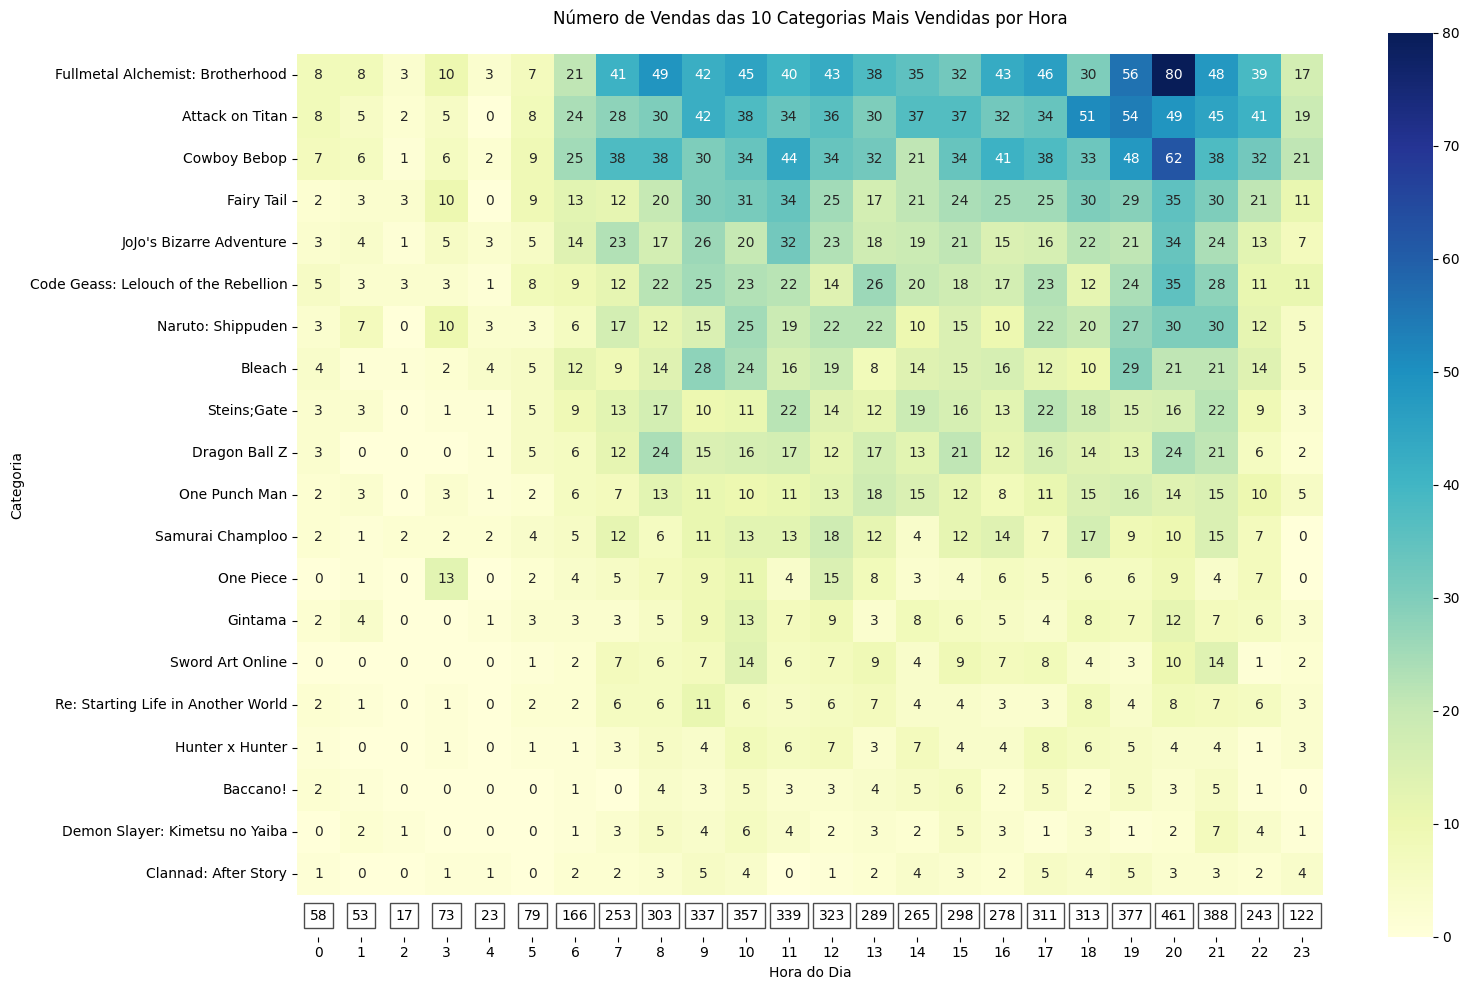

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que items_df seja o DataFrame com os dados
# Extrair a hora da coluna 'data_de_venda'
items_df['Hora'] = pd.to_datetime(items_df['data_de_venda']).dt.hour

# Agrupar as vendas por categoria e hora
contingency_table = pd.crosstab(items_df['Categoria'], items_df['Hora'])

# Calcular a soma total de vendas por categoria
total_vendas_por_categoria = contingency_table.sum(axis=1)

# Selecionar as 10 categorias que mais vendem
top_10_categorias = total_vendas_por_categoria.nlargest(20).index

# Filtrar a tabela de contingência para essas 10 categorias
contingency_table_top_10 = contingency_table.loc[top_10_categorias]

# Calcular o total de vendas por hora
total_vendas_por_hora = contingency_table_top_10.sum(axis=0)

# Criar o gráfico de calor
plt.figure(figsize=(16, 10))
ax = sns.heatmap(contingency_table_top_10, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

# Adicionar título e rótulos
plt.title('Número de Vendas das 10 Categorias Mais Vendidas por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Categoria')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Ajustar o layout para deixar espaço para os totais
plt.gca().set_ylim(len(top_10_categorias) + 1, -0.5)  # Expande o limite do gráfico

# Adicionar totais abaixo de cada coluna no heatmap
for i, total in enumerate(total_vendas_por_hora):
    plt.text(i + 0.5, len(top_10_categorias) + 0.5, total, ha='center', va='center', color='black',bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))


# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Transformar a tabela de contingência em uma matriz NumPy para análise
contingency_matrix = contingency_table_top_10.values

# Calcular a correlação entre as categorias e as horas
corr, _ = pearsonr(contingency_matrix.flatten(), np.repeat(np.arange(contingency_matrix.shape[1]), contingency_matrix.shape[0]))
print(f'Correlação de Pearson: {corr:.2f}')

Correlação de Pearson: -0.66


Interpretação:
Se a correlação é negativa: Significa que há uma tendência geral de que, em algumas horas do dia, quando as vendas em uma categoria são mais altas, a frequência de vendas em outras horas do dia pode ser menor. Ou seja, se você observar um aumento significativo nas vendas de uma categoria em um horário específico, é possível que em outros horários as vendas dessa categoria sejam relativamente menores.

Exemplo Prático:

Suponha que você tenha observado que as vendas de uma determinada categoria são mais altas durante a manhã (por exemplo, entre 9h e 12h). Se a correlação entre as vendas dessa categoria e a hora do dia é
−
0.52
−0.52, isso sugere que pode haver uma tendência de que, conforme o número de vendas nessa categoria aumenta nas manhãs, as vendas podem ser relativamente menores em outras horas do dia, ou seja, há uma variação inversa nas vendas ao longo do dia.


In [ ]:
from scipy.stats import chi2_contingency

# Teste Qui-Quadrado
chi2, p, _, _ = chi2_contingency(contingency_matrix)
print(f'Qui-Quadrado: {chi2:.2f}, p-valor: {p:.2f}')

Qui-Quadrado: 522.66, p-valor: 0.00


O teste Qui-Quadrado é uma ferramenta estatística usada para determinar se há uma associação significativa entre duas variáveis categóricas. No contexto do seu heatmap de horas e categorias de produtos, o teste Qui-Quadrado ajuda a entender se a distribuição das vendas entre as categorias e as horas é independente ou se há uma relação significativa entre essas variáveis.

Aqui está o que os resultados do teste Qui-Quadrado indicam:

Resultados do Teste Qui-Quadrado
Qui-Quadrado: 791.43

Este é o valor do teste Qui-Quadrado calculado a partir dos dados. É uma medida da discrepância entre os valores observados e os valores esperados em uma tabela de contingência.
p-valor: 0.00

O p-valor é muito baixo, geralmente indicado como 0.00 em muitos relatórios, mas é importante notar que isso significa que o valor é menor do que o nível de significância mais comum, como 0.01 ou 0.05.
Interpretação
Associação Significativa:

Um p-valor muito baixo (menor do que 0.05) indica que há uma associação significativa entre as variáveis categóricas (neste caso, as categorias dos produtos e as horas do dia). Em outras palavras, a distribuição das vendas entre as horas não é independente das categorias dos produtos.
Rejeição da Hipótese Nula:

A hipótese nula do teste Qui-Quadrado é que não há associação entre as variáveis (ou seja, as vendas em diferentes horas são independentes das categorias dos produtos). Como o p-valor é muito baixo, você rejeita a hipótese nula e conclui que há uma associação significativa entre as categorias e as horas.
Significado Prático:

A associação significativa sugere que a maneira como as vendas são distribuídas entre as categorias de produtos varia ao longo das horas do dia. Isso pode significar que certos produtos são vendidos mais em horários específicos ou que há uma diferença clara na demanda ao longo do dia.
Conclusão
O teste Qui-Quadrado com um valor de 791.43 e um p-valor de 0.00 indica que há uma associação significativa entre as horas do dia e as categorias de produtos nas vendas. A distribuição das vendas não é aleatória e varia de acordo com a categoria do produto e a hora do dia. Esse resultado pode ser usado para ajustar estratégias de marketing, otimizar a alocação de recursos ou entender padrões de vendas específicos ao longo do dia.

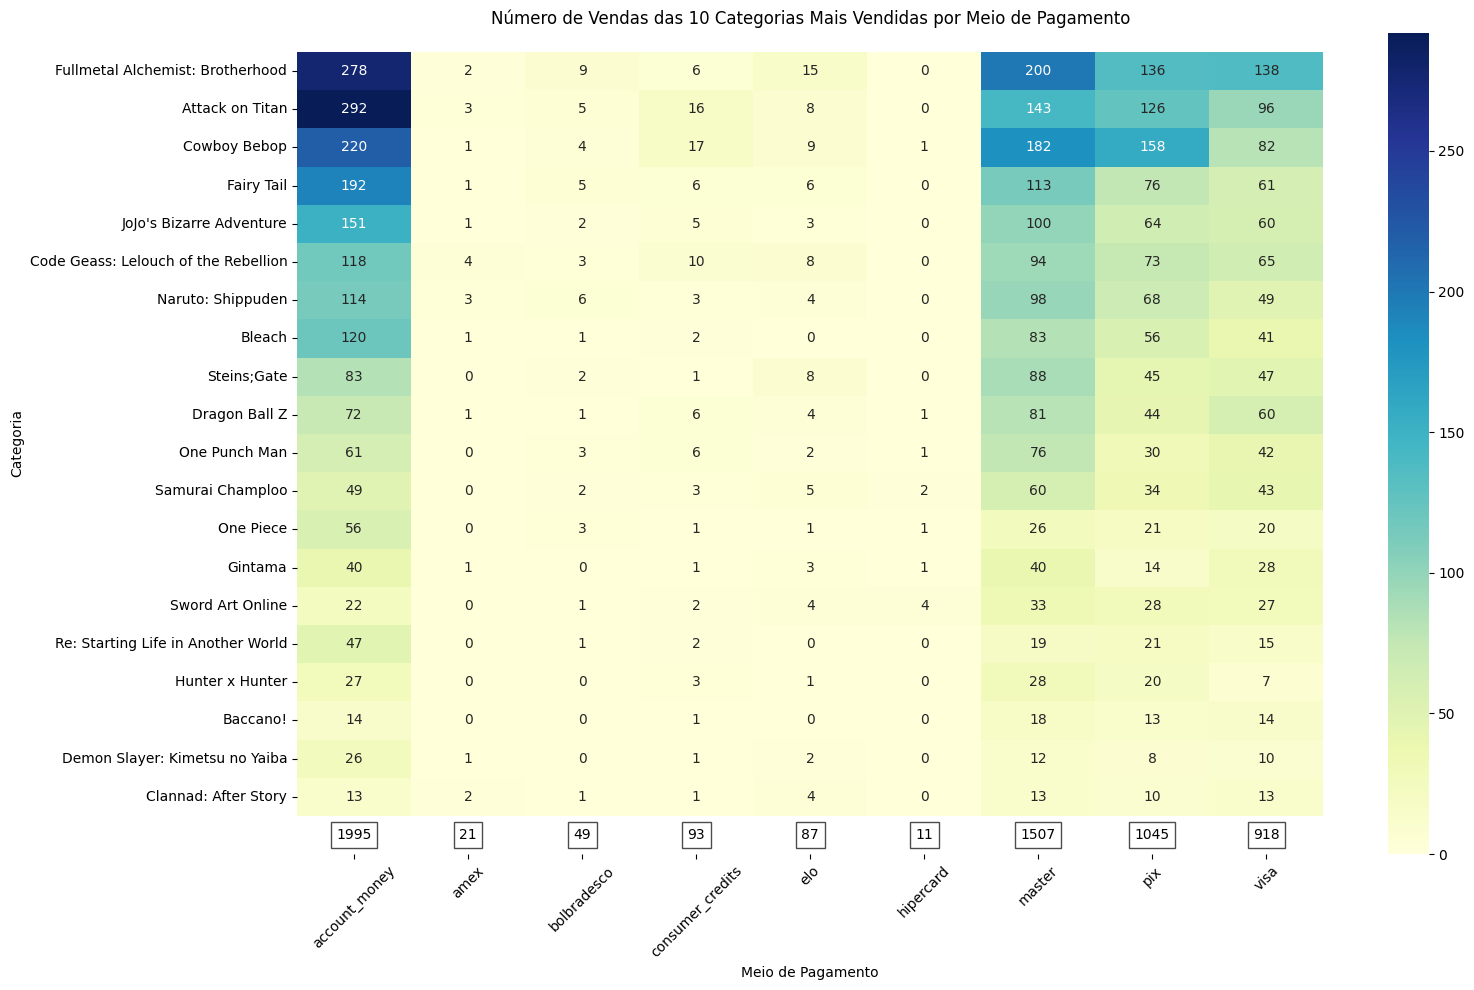

Qui-Quadrado: 339.26
P-valor: 0.00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Supondo que items_df seja o DataFrame com os dados
# Agrupar as vendas por categoria e meio de pagamento
contingency_table = pd.crosstab(items_df['Categoria'], items_df['meio_de_pagamento'])

# Calcular a soma total de vendas por categoria
total_vendas_por_categoria = contingency_table.sum(axis=1)

# Selecionar as 10 categorias que mais vendem
top_10_categorias = total_vendas_por_categoria.nlargest(20).index

# Filtrar a tabela de contingência para essas 10 categorias
contingency_table_top_10 = contingency_table.loc[top_10_categorias]

# Calcular o total de vendas por meio de pagamento
total_vendas_por_meio = contingency_table_top_10.sum(axis=0)

# Criar o gráfico de calor
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(contingency_table_top_10, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

# Adicionar título e rótulos
plt.title('Número de Vendas das 10 Categorias Mais Vendidas por Meio de Pagamento')
plt.xlabel('Meio de Pagamento')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Ajustar o layout para deixar espaço para os totais
plt.gca().set_ylim(len(top_10_categorias) + 1, -0.5)  # Expande o limite do gráfico

# Adicionar totais abaixo de cada coluna no heatmap
for i, total in enumerate(total_vendas_por_meio):
    plt.text(i + 0.5, len(top_10_categorias) + 0.5, total, ha='center', va='center', color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Calcular o teste qui-quadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table_top_10)

print(f"Qui-Quadrado: {chi2:.2f}")
print(f"P-valor: {p_value:.2f}")


Valor Qui-Quadrado
1. Valor Qui-Quadrado Elevado (Exemplo: 134)

Interpretação: Um valor qui-quadrado elevado indica que há uma grande discrepância entre as frequências observadas e esperadas na tabela de contingência. Isso sugere uma associação forte entre as variáveis, ou seja, as variáveis não são independentes e a diferença entre os grupos é considerável.

Consequências: Com um p-valor zero, isso confirma que a associação é estatisticamente significativa. Em outras palavras, a evidência contra a hipótese de independência é muito forte, e a associação entre as variáveis é notavelmente forte.

2. Valor Qui-Quadrado Baixo (Exemplo: 700)

Interpretação: Um valor qui-quadrado extremamente alto, como 700, sugere que a discrepância entre as frequências observadas e esperadas é muito grande. Assim, a associação entre as variáveis é muito forte e, na prática, os dados são muito diferentes do que seria esperado se as variáveis fossem independentes.

Consequências: Com um p-valor zero, como no exemplo anterior, isso significa que a associação é estatisticamente significativa. No entanto, o valor qui-quadrado tão alto indica uma associação ainda mais forte e uma discrepância maior entre os dados observados e esperados.

Comparação entre Valores de Qui-Quadrado
Valor Qui-Quadrado Elevado (134): Indica uma associação significativa e moderada entre as variáveis. Pode sugerir que as variáveis estão bastante relacionadas, mas não necessariamente com uma força extrema.

Valor Qui-Quadrado Muito Elevado (700): Indica uma associação muito forte entre as variáveis, com uma grande discrepância entre as frequências observadas e esperadas. Isso geralmente sugere que as variáveis estão fortemente associadas, e a discrepância é muito pronunciada.

Resumo
P-Valor: Um p-valor de zero indica que qualquer valor de qui-quadrado, seja ele baixo ou alto, é estatisticamente significativo e a hipótese de independência pode ser rejeitada.

Valor Qui-Quadrado: O valor absoluto do qui-quadrado reflete a força da associação. Valores mais altos indicam uma discrepância maior entre o que é observado e o que é esperado, sinalizando uma associação mais forte entre as variáveis.

Coeficiente de Correlação de Pearson: -0.04
                            OLS Regression Results                            
Dep. Variable:             Quantidade   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                   0.02779
Date:                Fri, 23 Aug 2024   Prob (F-statistic):              0.869
Time:                        22:11:33   Log-Likelihood:                -109.90
No. Observations:                  20   AIC:                             223.8
Df Residuals:                      18   BIC:                             225.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

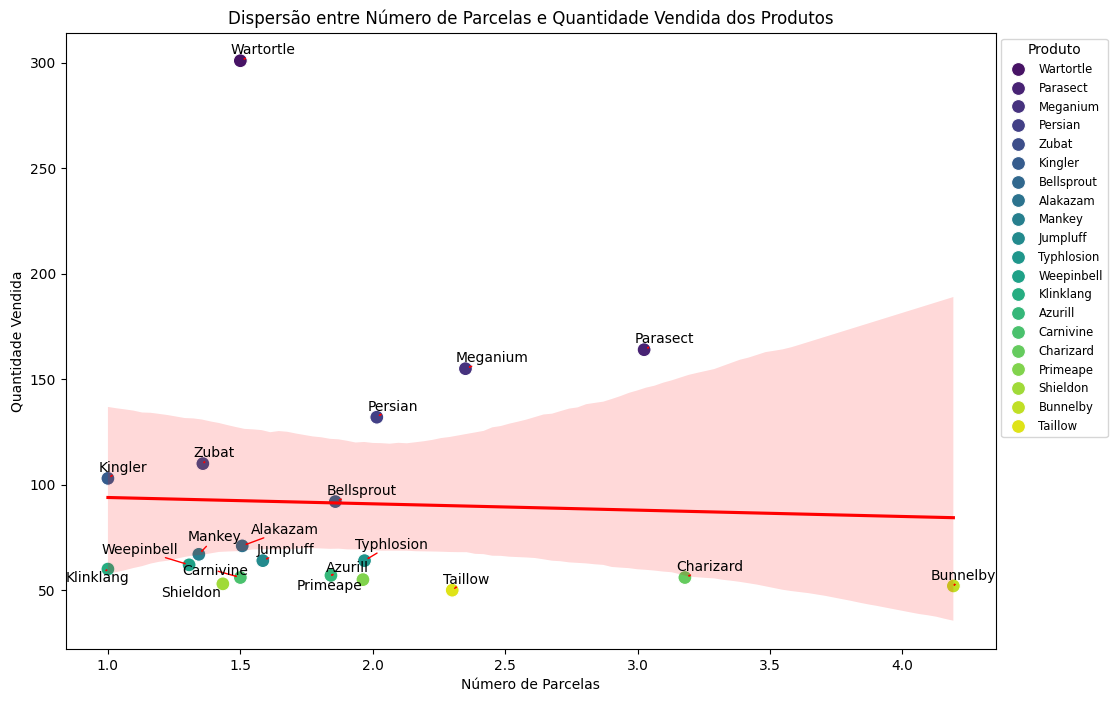

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from adjustText import adjust_text

# Agrupar os dados para calcular a quantidade total de vendas e o número de parcelas por produto
data_summary = items_df.groupby('Produto').agg({
    'Quantidade': 'sum',
    'numero_parcelas': 'mean'
}).reset_index()

# Limitar o número de produtos para evitar problemas de memória
top_products = data_summary.nlargest(20, 'Quantidade')  # Selecionar os 10 produtos com mais vendas

# Análise Estatística
# Coeficiente de Correlação de Pearson
correlation, _ = stats.pearsonr(top_products['numero_parcelas'], top_products['Quantidade'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Regressão Linear
X = sm.add_constant(top_products['numero_parcelas'])
y = top_products['Quantidade']
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de Dispersão com Regressão Linear
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=top_products, x='numero_parcelas', y='Quantidade', hue='Produto', palette='viridis', s=100)

# Adicionar a linha de regressão
sns.regplot(data=top_products, x='numero_parcelas', y='Quantidade', scatter=False, color='red')

# Adicionar anotações com nomes dos produtos e ajustar a posição para evitar sobreposição
texts = [plt.text(top_products['numero_parcelas'].iloc[i],
                  top_products['Quantidade'].iloc[i],
                  top_products['Produto'].iloc[i],
                  verticalalignment='bottom',
                  horizontalalignment='right',
                  fontsize=10)  # Reduzir o tamanho da fonte das anotações
         for i in range(len(top_products))]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
# Ajustar a posição e o tamanho da legenda
plt.legend(title='Produto', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')

plt.title('Dispersão entre Número de Parcelas e Quantidade Vendida dos Produtos')
plt.xlabel('Número de Parcelas')
plt.ylabel('Quantidade Vendida')
plt.show()


Coeficiente de Correlação de Pearson: -0.06
                            OLS Regression Results                            
Dep. Variable:             Quantidade   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.07314
Date:                Fri, 23 Aug 2024   Prob (F-statistic):              0.790
Time:                        22:10:35   Log-Likelihood:                -135.34
No. Observations:                  20   AIC:                             274.7
Df Residuals:                      18   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------


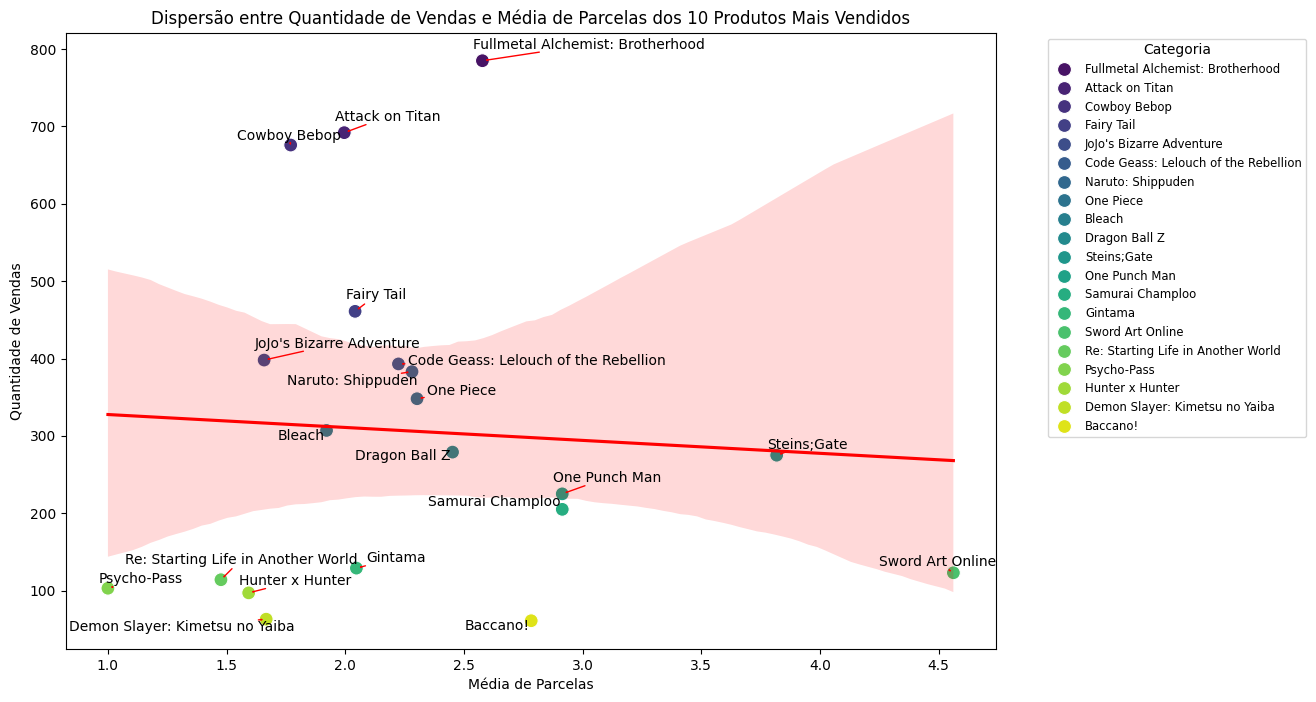

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from adjustText import adjust_text

# Supondo que items_df seja o DataFrame com os dados
# Agrupar os dados para calcular a quantidade total de vendas e o número médio de parcelas por produto
data_summary = items_df.groupby('Categoria').agg({
    'Quantidade': 'sum',
    'numero_parcelas': 'mean'
}).reset_index()

# Renomear a coluna de Quantidade_Parcelas
data_summary.rename(columns={'numero_parcelas': 'Média Parcelas'}, inplace=True)

# Limitar o número de categorias para evitar problemas de memória
top_categories = data_summary.nlargest(20, 'Quantidade')  # Selecionar as 10 categorias com mais vendas

# Análise Estatística
# Coeficiente de Correlação de Pearson
correlation, _ = stats.pearsonr(top_categories['Média Parcelas'], top_categories['Quantidade'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Regressão Linear
X = sm.add_constant(top_categories['Média Parcelas'])
y = top_categories['Quantidade']
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de Dispersão com Regressão Linear
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=top_categories, x='Média Parcelas', y='Quantidade', hue='Categoria', palette='viridis', s=100)

# Adicionar a linha de regressão
sns.regplot(data=top_categories, x='Média Parcelas', y='Quantidade', scatter=False, color='red')

# Adicionar anotações com nomes das categorias e ajustar a posição para evitar sobreposição
texts = [plt.text(top_categories['Média Parcelas'].iloc[i],
                  top_categories['Quantidade'].iloc[i],
                  top_categories['Categoria'].iloc[i],
                  verticalalignment='bottom',
                  horizontalalignment='right',
                  fontsize=10)  # Reduzir o tamanho da fonte das anotações
         for i in range(len(top_categories))]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Ajustar a posição e o tamanho da legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.title('Dispersão entre Quantidade de Vendas e Média de Parcelas dos 10 Produtos Mais Vendidos')
plt.xlabel('Média de Parcelas')
plt.ylabel('Quantidade de Vendas')
plt.show()
